In [164]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse import linalg
import matplotlib.pyplot as plt
import networkx as nx

def create_Lap(edgelist,n):
    """
    this function creates the Laplacian Matrix
    
    Argument: edgelist, number of entry in the row and column
    
    Return: Laplacian Matrix
    """
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    D = np.diag(W.sum(axis=0))
    L = D - W
    return L

def plot_eigenval(L,edgelist):
    (eigvalue, eigvec) = np.linalg.eig(L)
    eig_vals_sorted = np.sort(eigvalue)
    plt.plot(eig_vals_sorted)
    plt.show()

def plot_edge_eigenvec(L, p, q, edgelist):
    (eigvalue, eigvec) = np.linalg.eig(L)
    sort_eigvec = eigvec[:, eigvalue.argsort()]
    vec1 = sort_eigvec[:, p-1]
    vec2 = sort_eigvec[:, q-1]
    plt.scatter(vec1, vec2)
    for j,k in edgelist:
        plt.plot(vec1[[j,k]],vec2[[j,k]])
    plt.show()    

In [180]:
#Generagting Lapalcian with Sparse Matrix
def create_Lap_sparse(edgelist,n):
    W = np.zeros((n,n))
    for i,j in edgelist:
        W[i,j] = 1
        W[j,i] = 1
    D = np.diag(W.sum(axis=0))
    L = D - W
    L = sparse.csr_matrix(L)
    return L

def plot_eigenval_sparse(L,edgelist):
    vals, vecs = sparse.linalg.eigsh(L, k = L.shape[1] - 1, which = 'SM')
    plt.plot(vals)
    plt.show()
    
#Plot edges on pth and qth eigenvectors
def plot_edge_eigenvec_sparse(L, p, q, edgelist):
    """
    this function both scatters the pth and qth eigenvectors of sparse Laplacian Matrix
    
    and plots edges accodring to edgelist 
    
    Argument: Sparse Lapacian Matrix, pth eigenvectors in sorted sparse matrix, qth eigenvectors in sorted sparse matrix
    
    Notes: eigenvectors are sorted by lowest to highes values of eigenvalues in the sparse matrix
    """
    vals, vecs = sparse.linalg.eigsh(L, k = L.shape[1] - 1, which = 'SM')
    plt.scatter(vecs[:,p-1],vecs[:,q-1])
    vec1 = vecs[:,p-1]
    vec2 = vecs[:,q-1]
    for j,k in edgelist:
        plt.plot(vec1[[j,k]],vec2[[j,k]])
    plt.show()
    

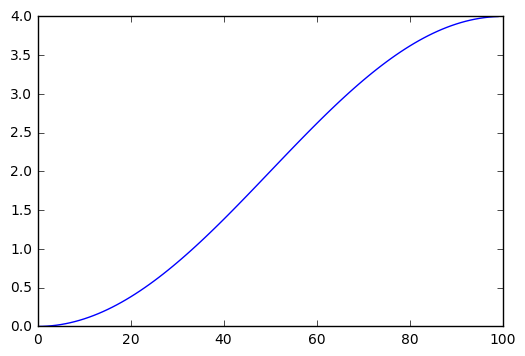

In [168]:
n = 100
edgelist = [[i,i+1] for i in range(n-1)]
L = create_Lap(edgelist, n)
#plot eig values
plot_eigenval(L, edgelist)

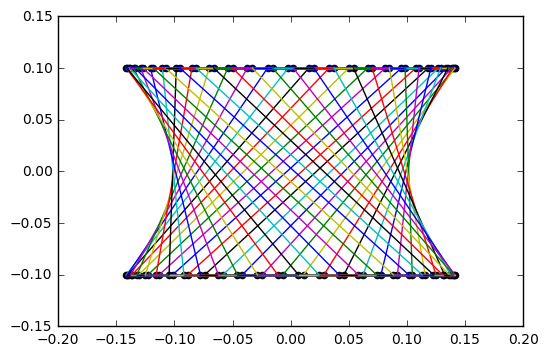

In [169]:
L = create_Lap(edgelist, n)
plot_edge_eigenvec(L, 50, 51, edgelist)

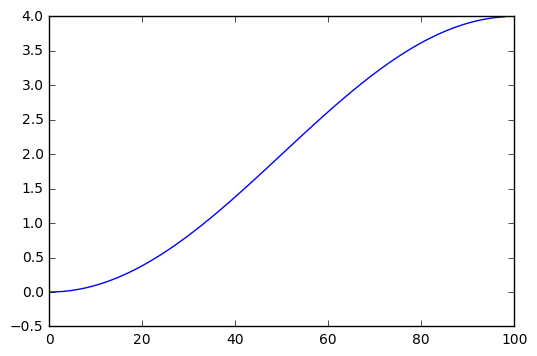

In [170]:
#plot eig values
plot_eigenval_sparse(L, edgelist)

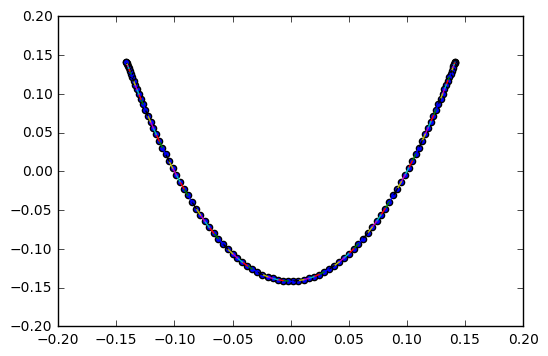

In [171]:
L = create_Lap_sparse(edgelist, n)
plot_edge_eigenvec_sparse(L, 2, 3, edgelist)

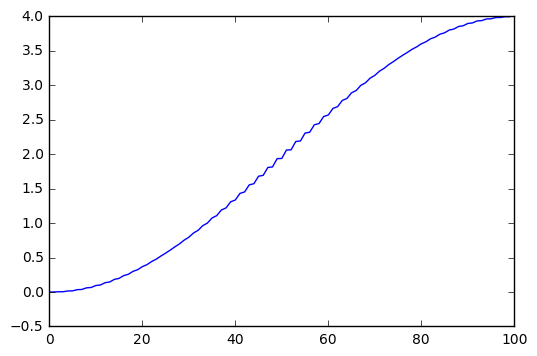

In [172]:
edgelist_del = edgelist
del edgelist_del[50]
L = create_Lap(edgelist_del, n)
#plot eig values
plot_eigenval(L, edgelist_del)

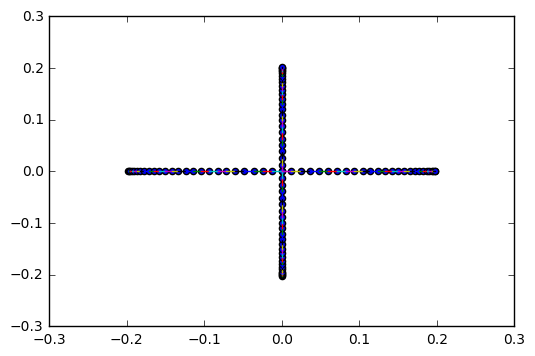

In [174]:
L = create_Lap(edgelist_del, n)
plot_edge_eigenvec(L, 3, 4, edgelist_del)

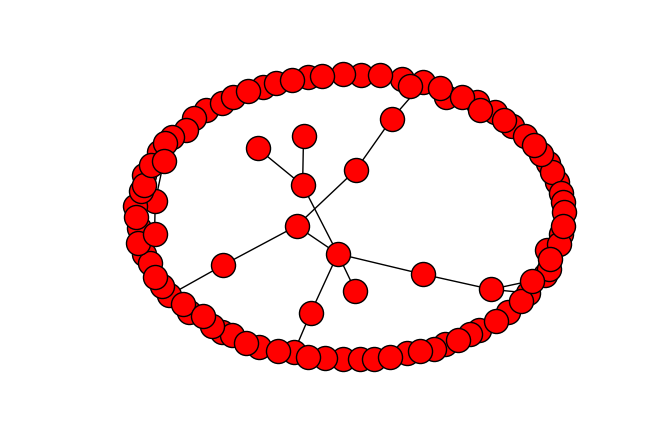

In [189]:
#Produces a graph picked randomly out of the set of all graphs with n nodes and m edges
n = 100
m = 50
D = nx.gnm_random_graph(n, m)
nx.draw(D)
plt.show()
edgelist = D.edges()
L = create_Lap(edgelist, n)
L_S = create_Lap_sparse(edgelist, n)

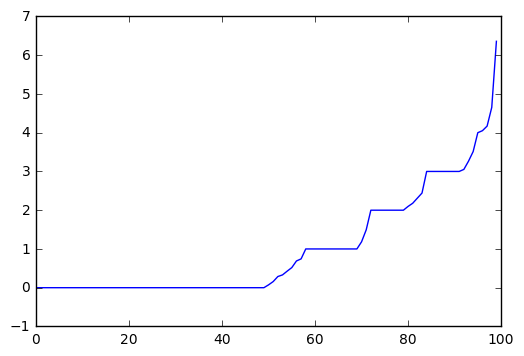

In [190]:
plot_eigenval(L, edgelist)
#Eigenvalues are zero until 50th node

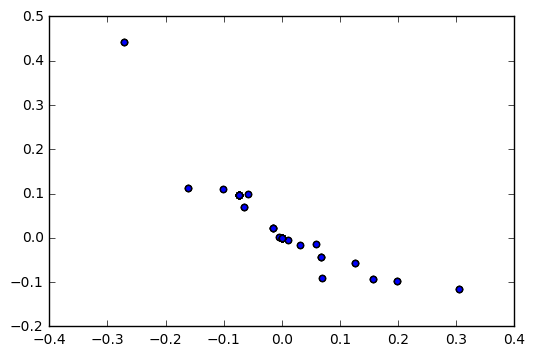

In [191]:
plot_edge_eigenvec(L, 2, 3, edgelist)

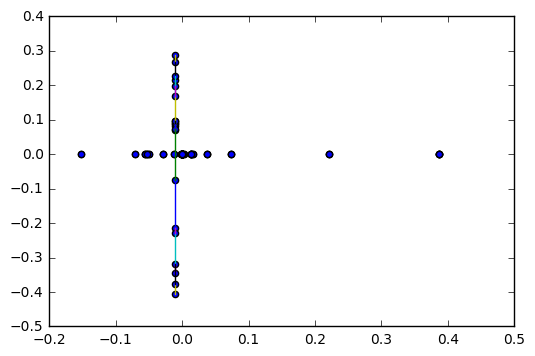

In [192]:
#50th and 51th Eigengenvectors
plot_edge_eigenvec(L, 50, 51, edgelist)

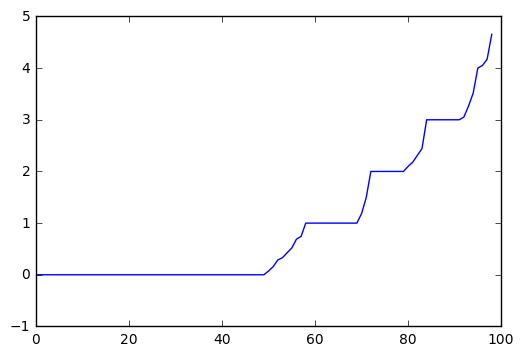

In [193]:
plot_eigenval_sparse(L_S, edgelist)

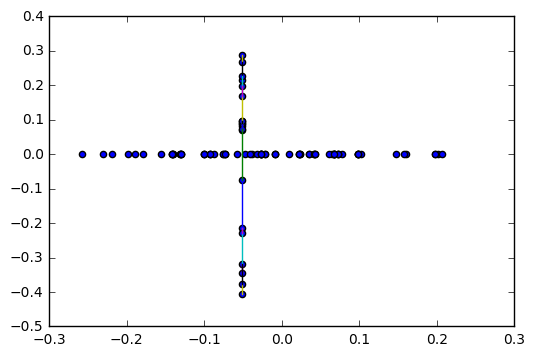

In [194]:
plot_edge_eigenvec_sparse(L_S, 50, 51, edgelist)

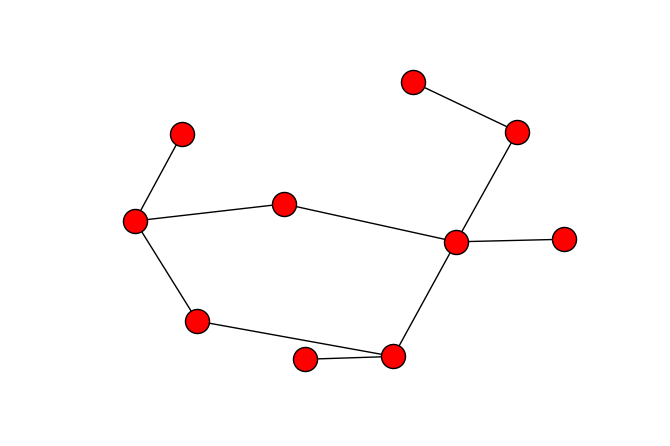

In [195]:
#Parameters: n (int) – The number of nodes
#k (int) – Each node is connected to k nearest neighbors in ring topology
#p (float) – The probability of rewiring each edge
n = 10
k = 3
p = 1
E = nx.watts_strogatz_graph(n, k, p)
nx.draw(E)
plt.show()
edgelist = E.edges() 

In [196]:
L = create_Lap(edgelist, n)
L_S = create_Lap_sparse(edgelist, n)

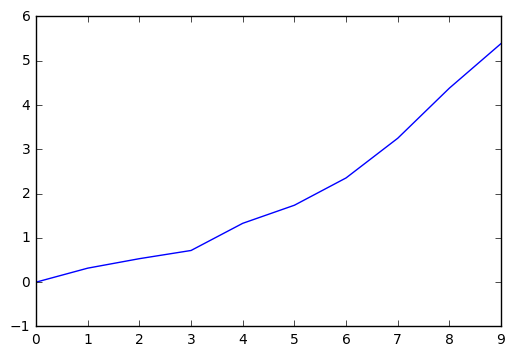

In [197]:
plot_eigenval(L, edgelist)

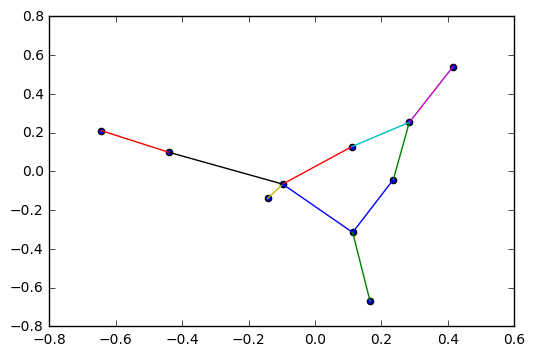

In [198]:
plot_edge_eigenvec(L, 2, 3, edgelist)

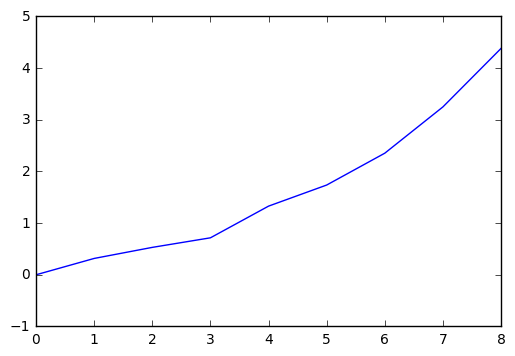

In [199]:
plot_eigenval_sparse(L_S, edgelist)

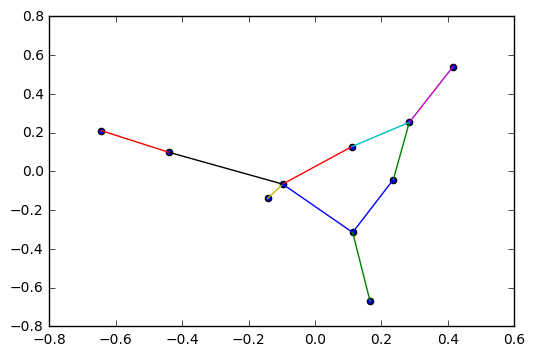

In [200]:
plot_edge_eigenvec_sparse(L_S, 2, 3, edgelist)